# Set up
In this first cell we upload the packages used in the notebook.
This were installed first in the venv. Check the requirements.txt file 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import session_info

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [2]:
## this cell shows whats installed in the venv, check the requirements.txt file
session_info.show()

# Importing dataset
In the next cell the dataset is imported from the dataset folder

The dataset is 470.67MB so this notebook is designed to use this dataset from local path

In [3]:
file_path = "c:/Users/oscar.betanzos/Documents/Dataset/onlinefraud.csv"
data = pd.read_csv(file_path)
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [7]:
# number of rows and columns
data.shape

(6362620, 11)

In [8]:
# Now, let’s have a look at whether this dataset has any null values or not

print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [8]:
# Exploring transaction type

print(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [9]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(data, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

## Quantitative Analysis

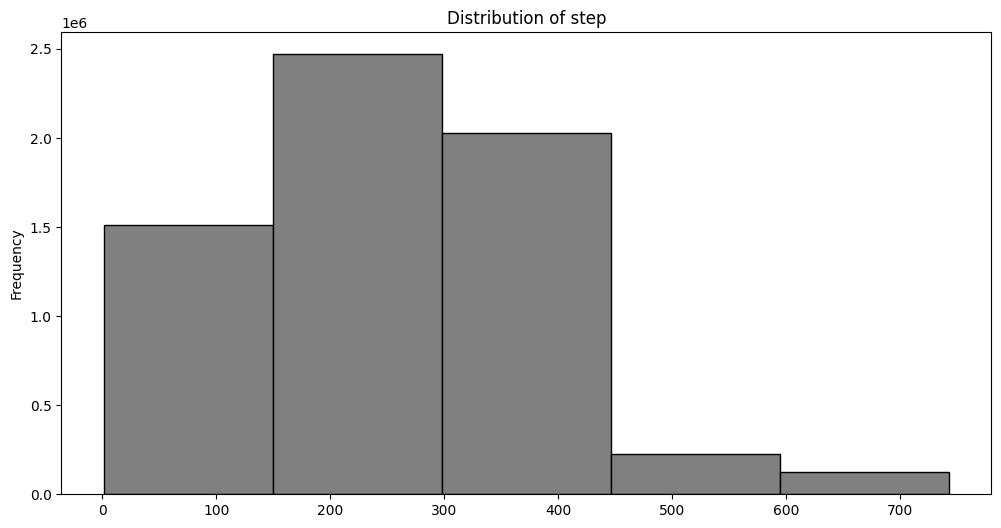

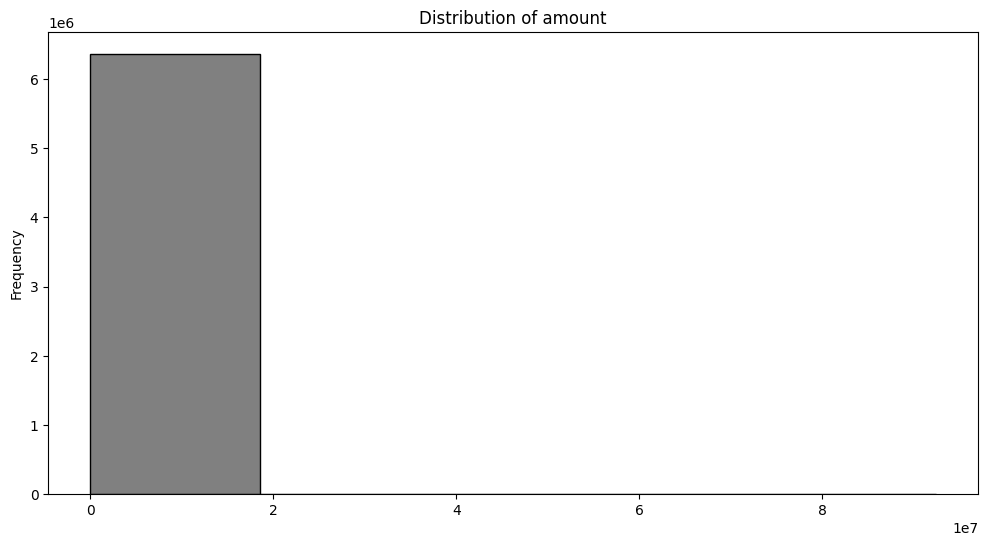

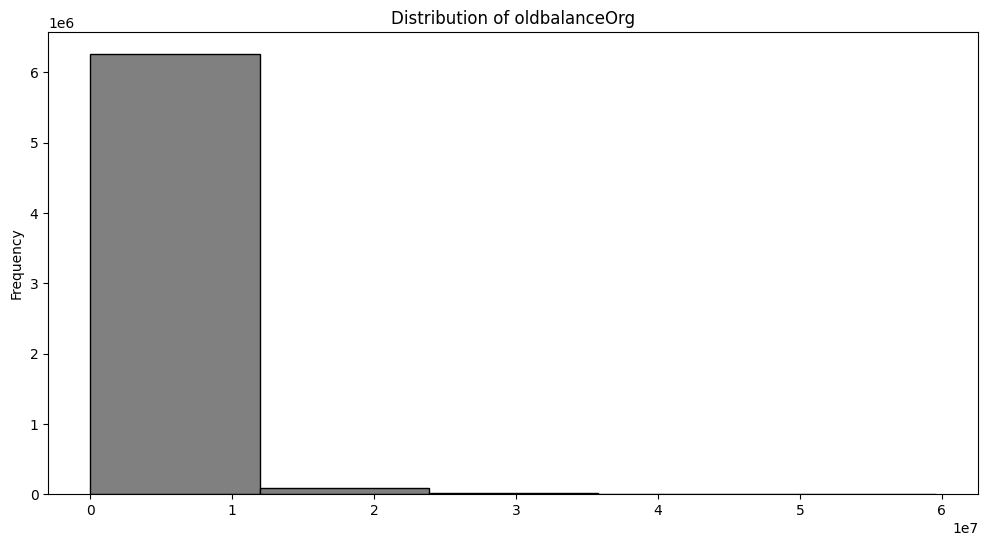

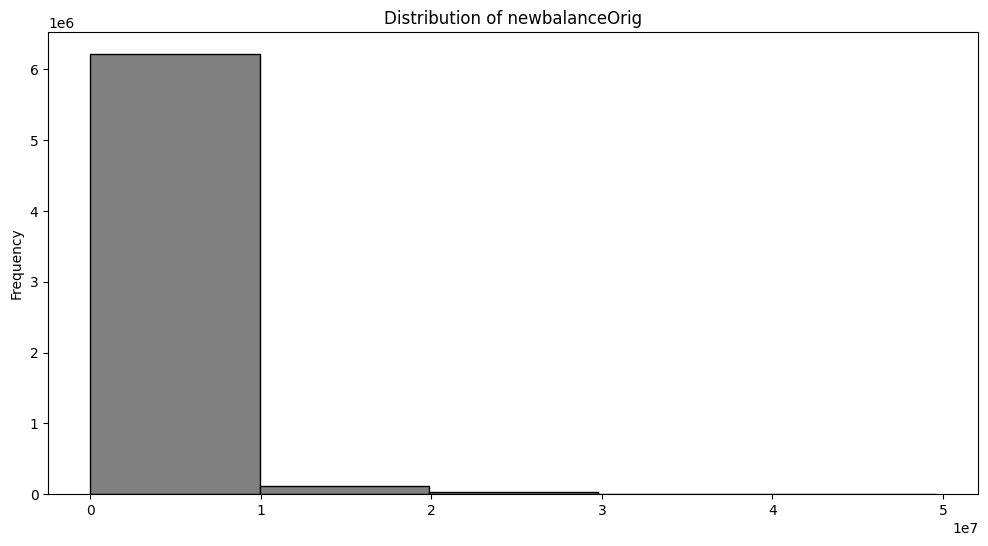

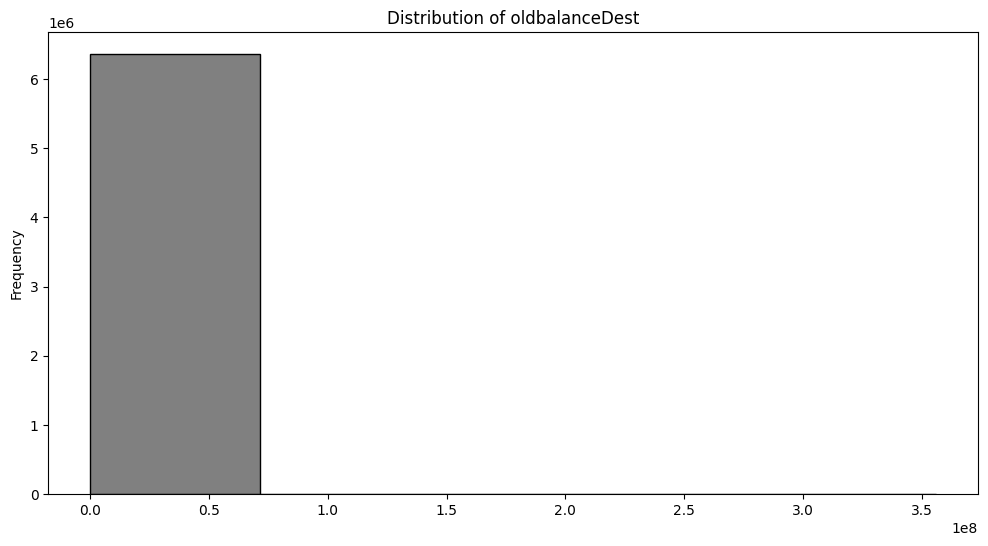

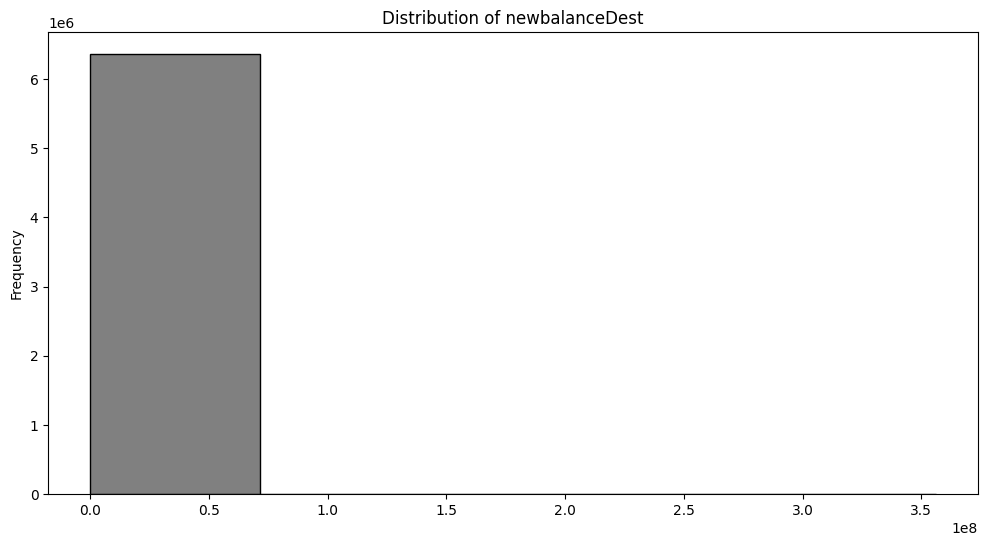

In [10]:
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()

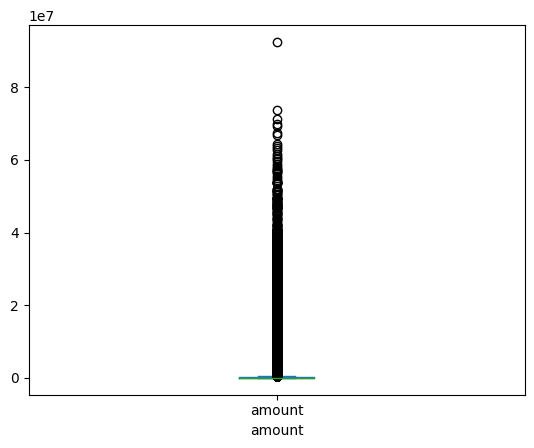

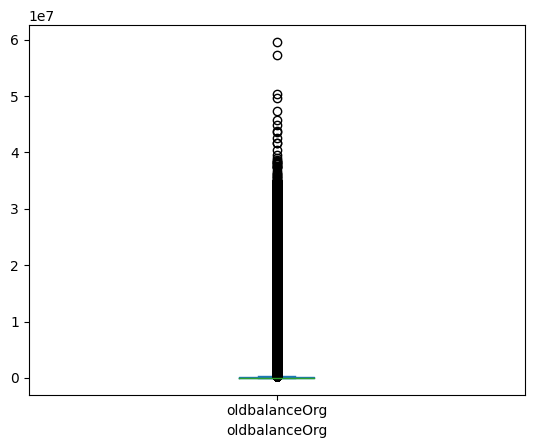

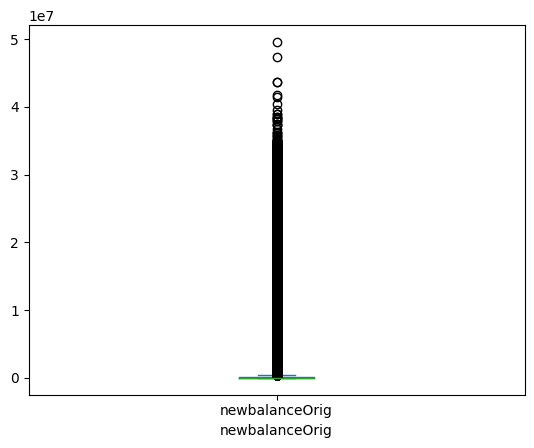

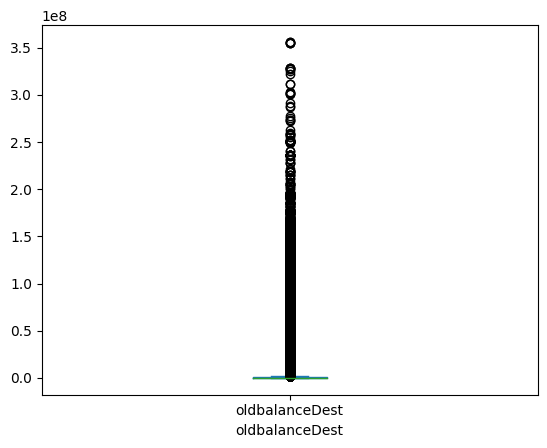

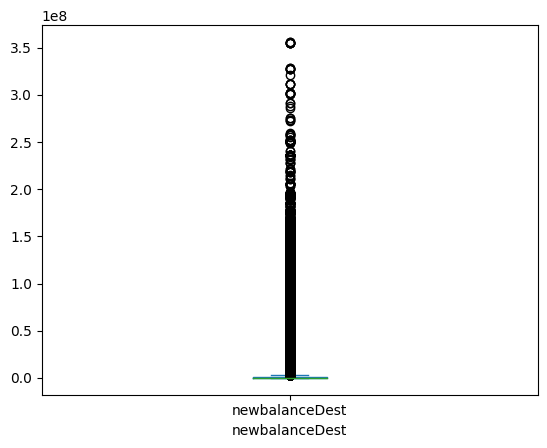

In [11]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='box')
    plt.show()

### Observations
Features are highly skewed except step column, there must be outliers in data

In [12]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = data[i].quantile(0.10)
    upper = data[i].quantile(0.90)
    data[i] = np.where(data[i] <lower, lower,data[i])
    data[i] = np.where(data[i] >upper, upper,data[i])
    print('Feature: ',i)
    print('Skewness value: ',data[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




## Distribution after removing outliers

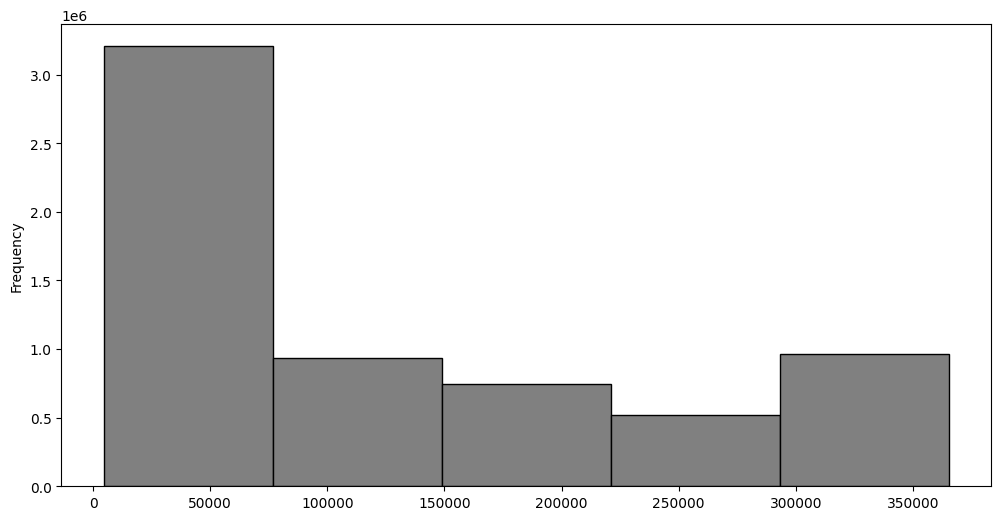

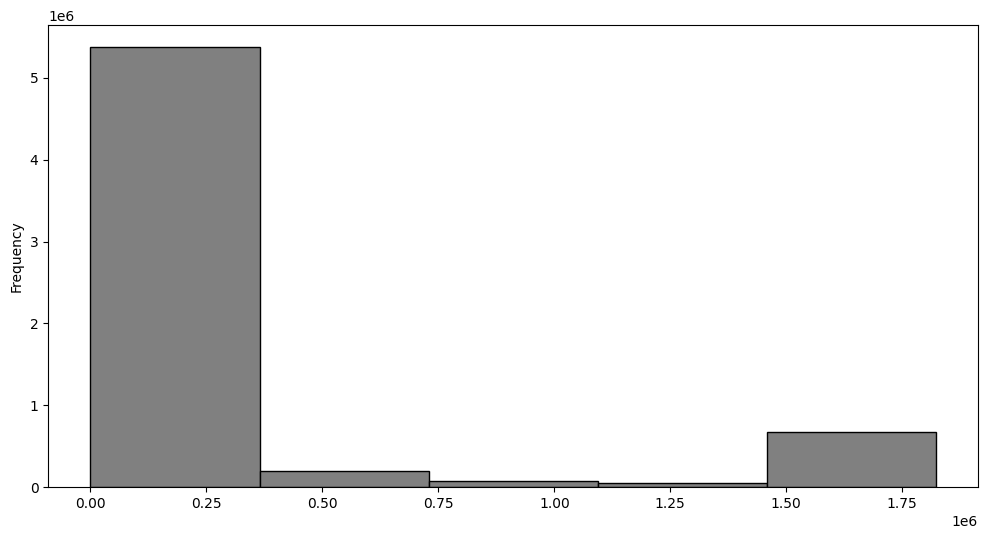

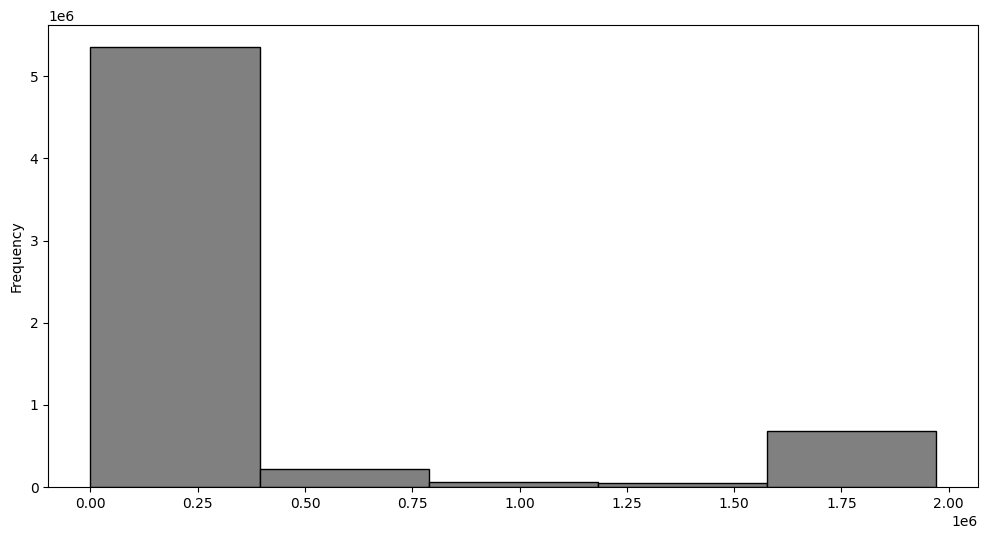

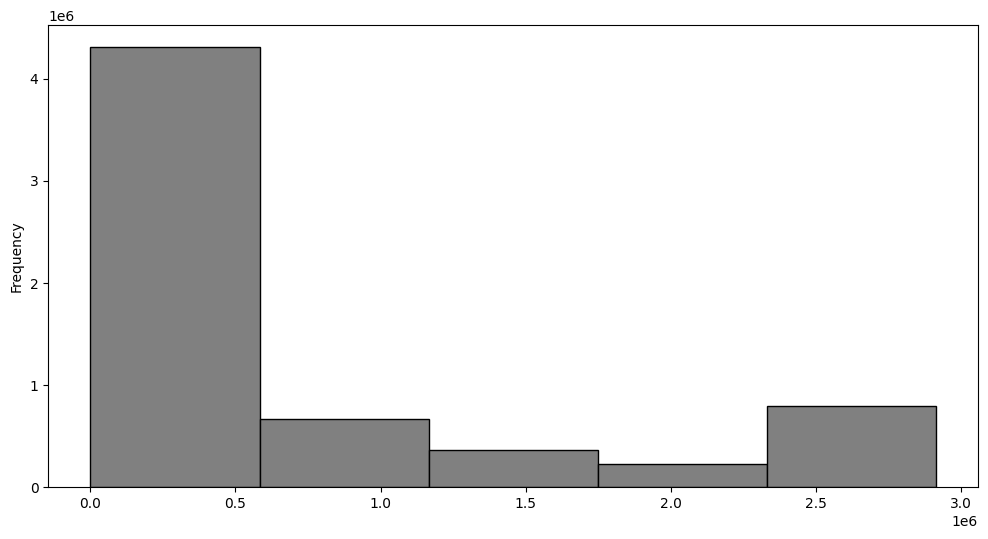

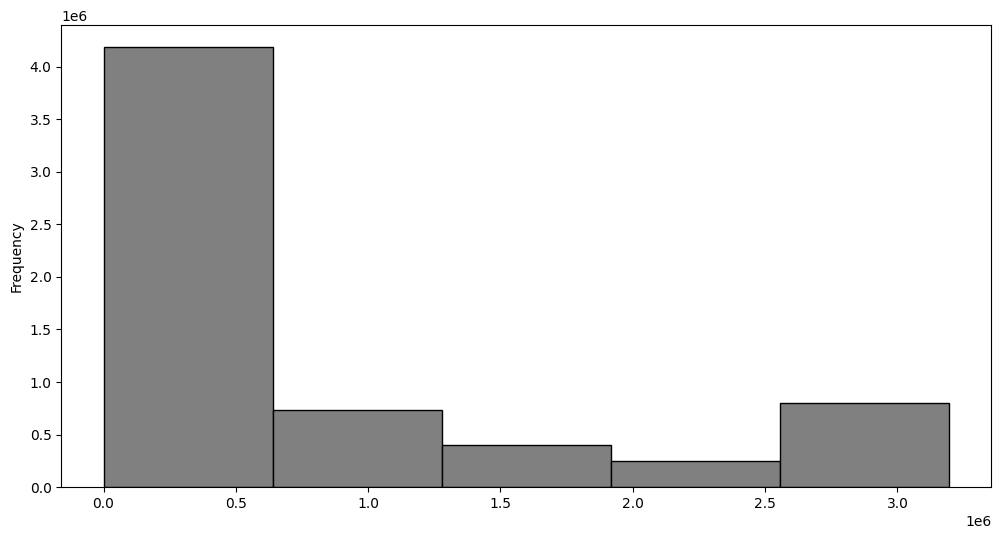

In [13]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

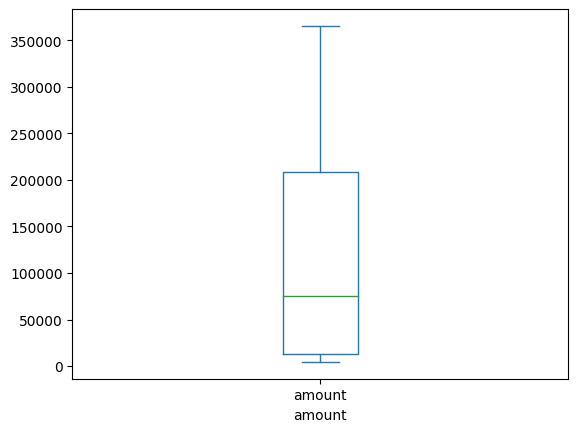

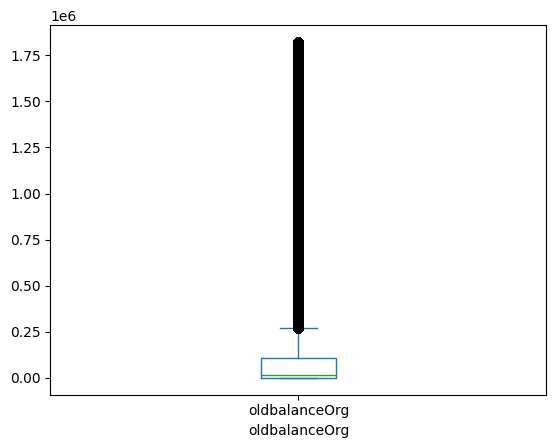

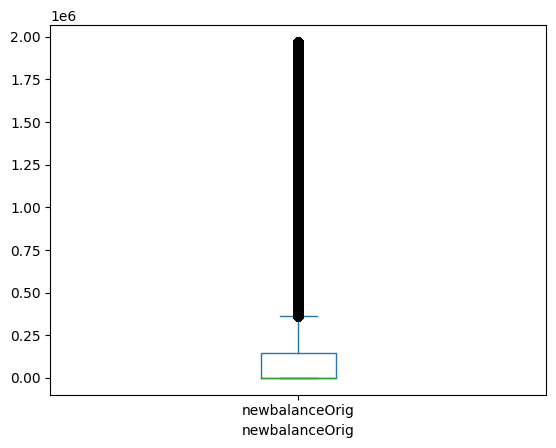

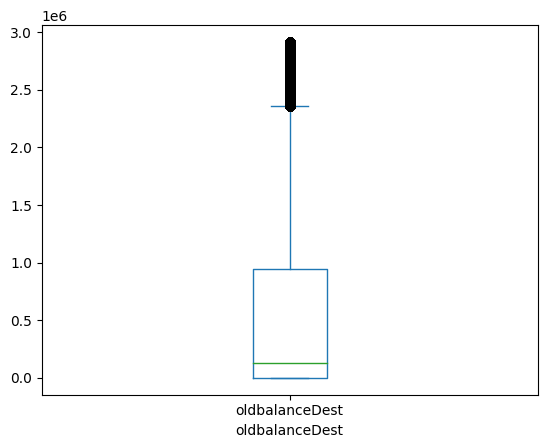

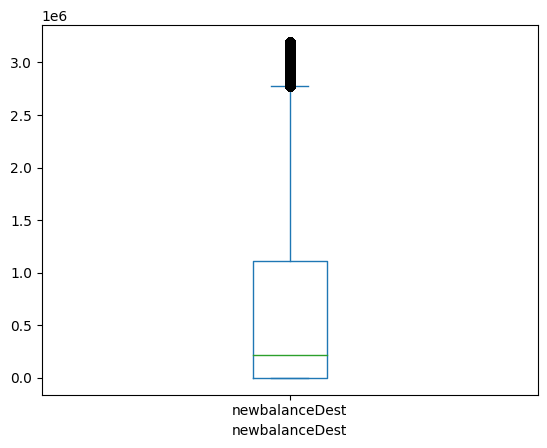

In [14]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='box')
    plt.show()

### Columns we'll analyze further:

* type
* amount
* nameDest
* isFraud
* isFlaggedFraud
* step

In [15]:
CrosstabResult=pd.crosstab(index=data.type,columns=data.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


(3500.0, 7000.0)

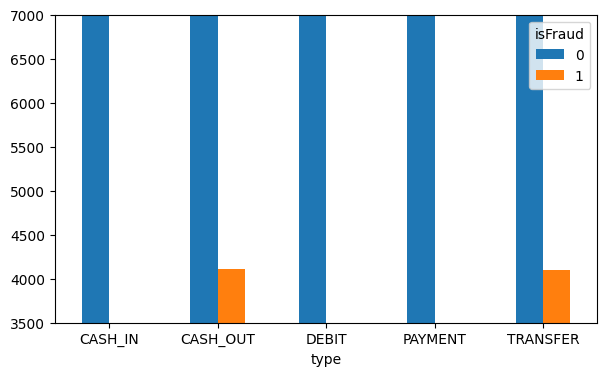

In [16]:
# Grouped bar chart between TYPE and ISFRAUD by changing ylimit to view isFraud values
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

<Axes: >

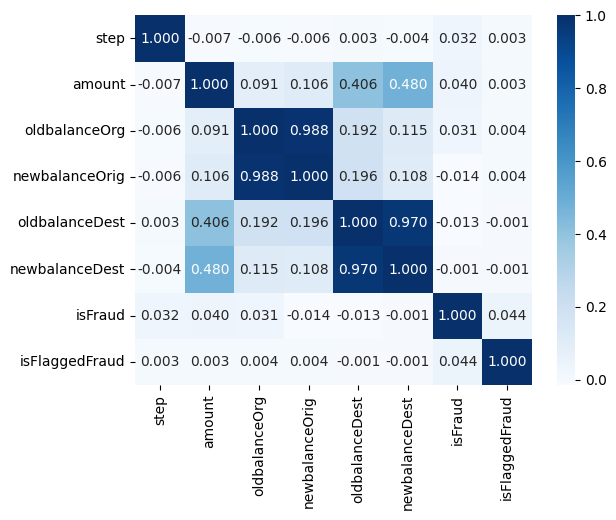

In [20]:
# calculate correlation matrix and plot the correlation matrix heatmap
corr = data[['step','amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

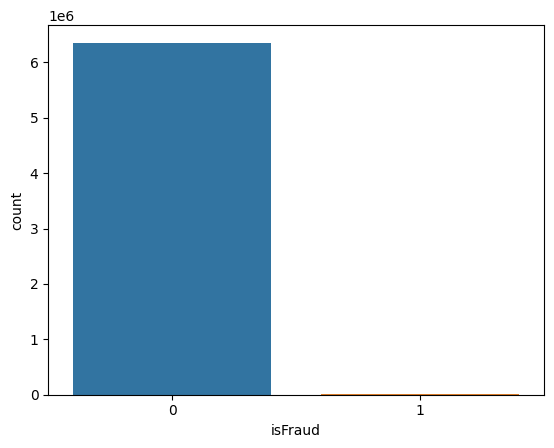

In [21]:
# count plot on single categorical variable
sns.countplot(x ='isFraud', data = data)
 
# Show the plot
plt.show()

In [22]:
data.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

## Feature Engineering
### 1st Iteration

In [23]:
# Now let’s transform the categorical features into numerical. Here we will also transform the values of the isFraud column into 
# No Fraud and Fraud labels to have a better understanding of the output
# Changing CASH_OUT to 1, PAYMENT to 2, CASH_IN to 3, TRANSFER to 4 and DEBIT to 5 

data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   4501.30  C1666544295        21249.0        19384.72   
2     1     4   4501.30  C1305486145          181.0            0.00   
3     1     1   4501.30   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [24]:
# splitting the data

x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [25]:
# training a machine learning model

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9993603264064175


In [26]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]

features = np.array([[1, 8900.2, 8990.2, 0.0]])
print(model.predict(features))

['Fraud']


### Conclusion

* We have large number of records which are incorrectly flagged as 0.
* Incorrect flagging might have big impact in future if we don't calculate it properly as it might lead to increase in online payment fraud percentage as people relay more on online payment nowadays.
* The amount range usually fraudsters target is aroung 1-4 lakhs which is certainly a large sum.
* Fraudsters focus during cashout and transfer mode type transfer.
* Fraud is less likely/rare to happen during payment mode transfer though people are using online payment more.
* There is not much information taken from oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest and newbalanceDest columns though they had good positive correlation score

### Analysis insights
1. What is the fraud percent that has happened in the overall transaction ?
Totally there is 8213 fraud transactions happened which constitutes around 0.13% of total transactions happened

2. Under which type of transfer payment type fraud has occurred mostly.
Fraud has happened only in cashout and transfer type. 0.183 % fraud happened in total cashout mode type and 0.769 % fraud happened in total transfer mode type

3. Were we able to mark the fraud transaction as isFlaggedFraud?
No. Only 16 records of the 63 lakh records were flagged as fraud which is very less that constitutes to 0.195 % of the total fraud transactions.

4. What is the percentage of incorrect flagged fraud records?
We have around 8197 records which are incorrectly flagged as 0 which constitutes 99.805 % of total fraud records

5. Were all the isFlaggedFraud records that are marked as fraud is correct?
Yes. All the 16 transactions that are flagged as fraud is actually fraud transactions

6. At what amount range, fraud has happened?
The fraud amount transaction ranges between 1.3-3.6 lakh with most occurred in the range 340,000-360,000 (3.4-3.6 lakh).